# Практическая работа 3. Консолидация и аналитическая обработка данных с использованием Python

## Задание 5

**Цель:** Рассчитать общую выручку для каждой авиакомпании на основе консолидации данных из трех источников:
- **Файл 1 (CSV):** Филиалы:branch_id, city, employees_count
- **Файл 2 (Excel):** Продажи: branch_id, sale_amount
- **Файл 3 (JSON):** Планы продаж: branch_id, monthly_plan

## Библиотеки и подключения

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✓ Библиотеки загружены")


✓ Библиотеки загружены


## 1. Загрузка данных из различных источников


In [30]:
# Загрузка данных об авиакомпаниях (CSV)
df_branch = pd.read_csv('data/branch.csv')
print("Данные об filialah (CSV):")
print(f"Форма данных: {df_branch.shape}")
print(df_branch.head())
print("\n" + "="*50 + "\n")


Данные об filialah (CSV):
Форма данных: (1000, 3)
     branch_id          city  employees_count
0  branch00001  Екатеринбург                6
1  branch00002          Омск               34
2  branch00003        Самара               20
3  branch00004  Екатеринбург               89
4  branch00005        Тюмень               14




In [31]:
# Загрузка данных о sales (Excel)
df_sales = pd.read_excel('data/sales.xlsx')
print("Данные о рейсах (Excel):")
print(f"Форма данных: {df_sales.shape}")
print(df_sales.head())
print("\n" + "="*50 + "\n")


Данные о рейсах (Excel):
Форма данных: (1000, 2)
     branch_id  sales_amount
0  branch00795        249955
1  branch00038        163848
2  branch00207         32967
3  branch00811        114579
4  branch00908         31970




In [32]:
# Загрузка данных о билетах (JSON)
with open('data/sales_plan.json', 'r', encoding='utf-8') as f:
    sales_plan_data = json.load(f)

sales_plan_data = pd.DataFrame(sales_plan_data)
print("Данные о билетах (JSON):")
print(f"Форма данных: {sales_plan_data.shape}")
print(sales_plan_data.head())
print("\n" + "="*50 + "\n")


Данные о билетах (JSON):
Форма данных: (1000, 2)
     branch_id  monthly_plan
0  branch00001        213888
1  branch00002        264617
2  branch00003         82538
3  branch00004        148885
4  branch00005        225173




## 2. Консолидация данных и расчет выручки


In [ ]:
# Объединение всех данных

df_merge = pd.merge(df_branch, df_sales, on='branch_id', how='inner')
df_consolidated = pd.merge(df_merge, sales_plan_data, on='branch_id', how='inner')

df_consolidated.head(5)

,branch_id,city,employees_count,sales_amount,monthly_plan
0,branch00006,Тольятти,57,171620,204698
1,branch00007,Санкт-Петербург,6,146726,244973
2,branch00007,Санкт-Петербург,6,289032,244973
3,branch00007,Санкт-Петербург,6,217456,244973
4,branch00010,Ижевск,6,166443,219209


In [ ]:

# процент выполнения плана продаж 
df_consolidated['percent'] = (df_consolidated['sales_amount'] / df_consolidated['monthly_plan']) *100
df_consolidated['percent'] = df_consolidated['percent'].round(2)

print("Консолидированные данные:")
print(f"Форма данных: {df_consolidated.shape}")
print(df_consolidated.head())


Консолидированные данные:
Форма данных: (1000, 6)
     branch_id             city  employees_count  sales_amount  monthly_plan  \
0  branch00006         Тольятти               57        171620        204698   
1  branch00007  Санкт-Петербург                6        146726        244973   
2  branch00007  Санкт-Петербург                6        289032        244973   
3  branch00007  Санкт-Петербург                6        217456        244973   
4  branch00010           Ижевск                6        166443        219209   

   percent  
0    83.84  
1    59.89  
2   117.99  
3    88.77  
4    75.93  


## 3. Визуализация результатов


<function matplotlib.pyplot.show(close=None, block=None)>

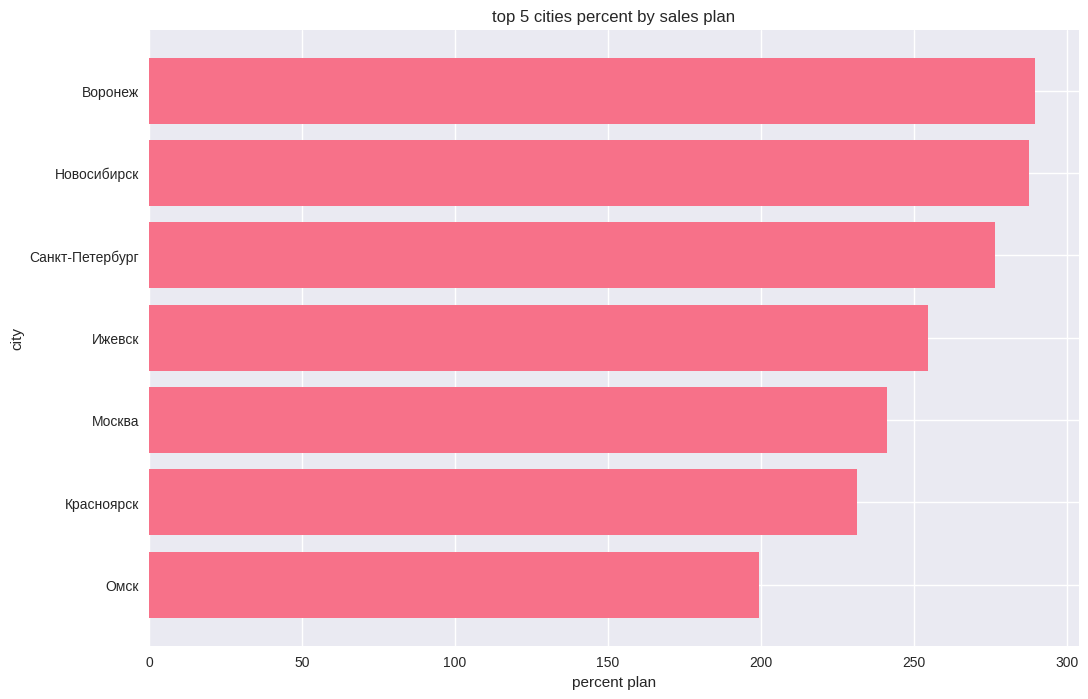

In [ ]:
# топ 5 городов по проценту выполнения плана продаж


city_stat = df_consolidated.groupby("city")["percent"].mean().reset_index()

top_7 = city_stat.sort_values(by="percent",ascending=True).head(7)


plt.figure(figsize=(12,8 ))
plt.barh(top_7["city"],top_7["percent"])
plt.title("top 5 cities percent by sales plan")
plt.ylabel("city")
plt.xlabel("percent plan")           
plt.show



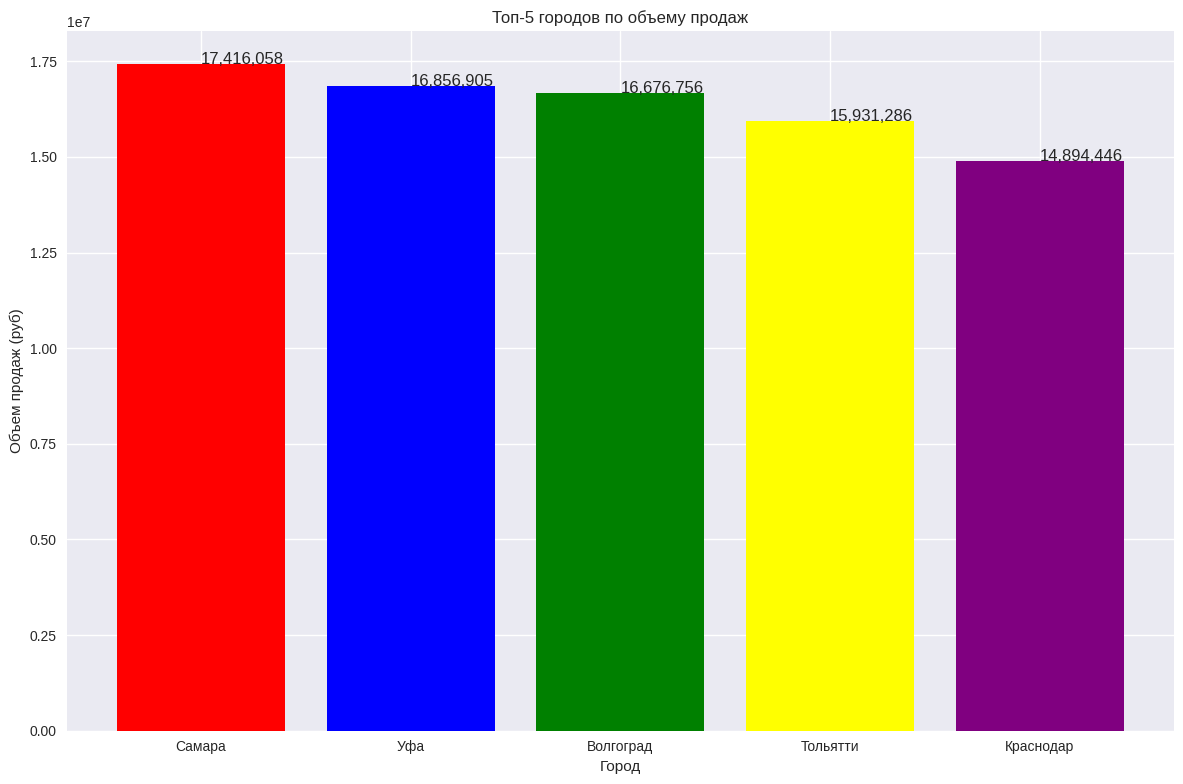

In [ ]:


city_sales = df_consolidated.groupby("city")["sales_amount"].sum().reset_index()
top_5 = city_sales.sort_values(by="sales_amount", ascending=False).head(5)

plt.figure(figsize=(12, 8))


plt.bar(top_5['city'], top_5['sales_amount'], 
        color=['red', 'blue', 'green', 'yellow', 'purple'])

#  значения над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500,
             f'{height:,.0f}' )


plt.xlabel('Город')
plt.ylabel('Объем продаж (руб)')
plt.title('Топ-5 городов по объему продаж')


plt.tight_layout()
plt.show()

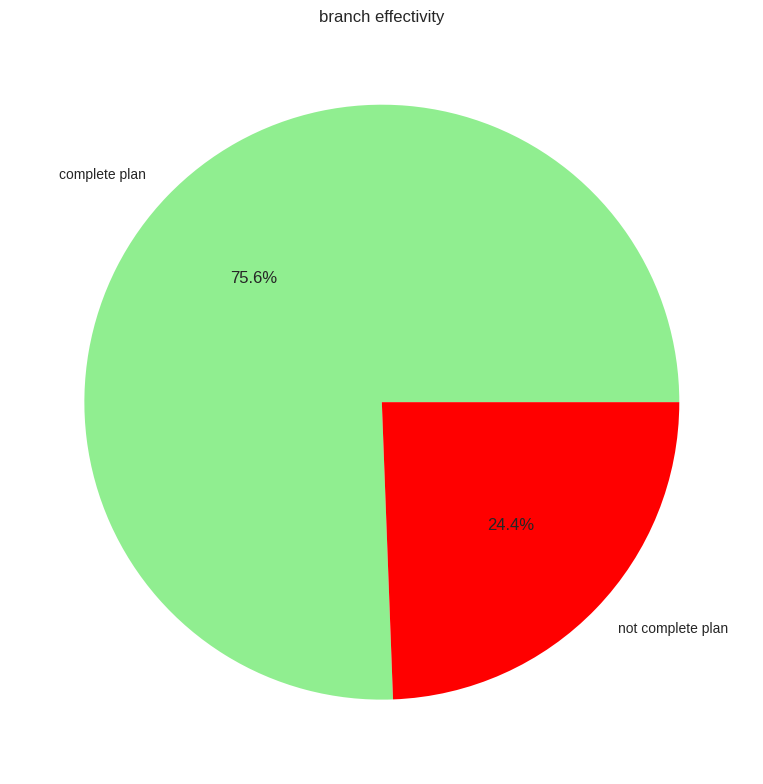

In [ ]:


df_consolidated['result'] = df_consolidated['percent'].apply(
    lambda x: 'complete plan' if x >= 90 else 'not complete plan'
)

counts = df_consolidated['result'].value_counts()

plt.figure(figsize=(12, 8))

colors = ['lightgreen', 'red']  


plt.pie(counts.values, labels=counts.index, 
                                   colors=colors,autopct='%1.1f%%',
)




plt.title('branch effectivity')


plt.tight_layout()
plt.show()



## 4. Выводы и сохранение результатов


In [74]:

city_sales = df_consolidated.groupby("city")["sales_amount"].sum()
city_sales = city_sales.sort_values(ascending=False).reset_index()


top_city = city_sales.iloc[0]['city']
top_sales = city_sales.iloc[0]['sales_amount']
total_sales = df_consolidated['sales_amount'].sum()
market_share = (top_sales / total_sales) * 100

print("=" * 50)
print("АНАЛИЗ ПРОДАЖ ПО ГОРОДАМ")
print("=" * 50)

print(f"1. Лидер по продажам: {top_city}")
print(f"   - Объем продаж: {top_sales:,.0f} руб.")
print(f"   - Доля от общих продаж: {market_share:.1f}%")

print(f"\n2. Общий объем продаж: {total_sales:,.0f} руб.")
print(f"3. Количество городов: {len(city_sales)}")
print(f"4. Средние продажи на город: {city_sales['sales_amount'].mean():,.0f} руб.")


print("\n5. ТОП-3 города по продажам:")
for i, row in city_sales.head(3).iterrows():
    city = row['city']
    sales = row['sales_amount']
    share = (sales / total_sales) * 100
    print(f"   {i+1}. {city}: {sales:,.0f} руб. ({share:.1f}%)")


total_plan = df_consolidated['monthly_plan'].sum()
plan_completion = (total_sales / total_plan) * 100
completed_branches = (df_consolidated['percent'] >= 90).sum()
total_branches = len(df_consolidated)

print(f"\n6. Выполнение плана в целом: {plan_completion:.1f}%")
print(f"7. Филиалов выполнило план (≥90%): {completed_branches} из {total_branches}")
print(f"   ({completed_branches/total_branches*100:.1f}% филиалов)")


df_consolidated.to_csv('data/consolidated_data.csv', index=False)
print("\n" + "=" * 50)
print("✓ Результаты сохранены в 'data/city_sales_summary.csv'")
print("✓ Анализ завершен успешно!")



АНАЛИЗ ПРОДАЖ ПО ГОРОДАМ
1. Лидер по продажам: Самара
   - Объем продаж: 17,416,058 руб.
   - Доля от общих продаж: 6.9%

2. Общий объем продаж: 251,673,897 руб.
3. Количество городов: 20
4. Средние продажи на город: 12,583,695 руб.

5. ТОП-3 города по продажам:
   1. Самара: 17,416,058 руб. (6.9%)
   2. Уфа: 16,856,905 руб. (6.7%)
   3. Волгоград: 16,676,756 руб. (6.6%)

6. Выполнение плана в целом: 170.3%
7. Филиалов выполнило план (≥90%): 756 из 1000
   (75.6% филиалов)

✓ Результаты сохранены в 'data/city_sales_summary.csv'
✓ Анализ завершен успешно!
